# 奇异值分解 SingularValueDecomposition

奇异值分解，是指把一个矩阵分解成一个对角线矩阵和两个酉矩阵。
$$M=U\Sigma V^H$$
其中，  
* $U$的列向量是$MM^T$的特征向量组成  
* $V$的列向量是由$M^TM$的特征向量组成的  
* $\Sigma$是$M^TM$的特征值的平方根。
  
先把奇异值分解写成$MV=U\Sigma$的形式。此时，可以把矩阵$M$理解成一个对$V$线性变换的矩阵。  
奇异值分解的目的，就是要找这样一个矩阵$V$，使得左乘矩阵$M$后的$MV$，可以分解成$U\Sigma$，即由一组标准正交基组成的酉矩阵，及其正交基对应的轴上的模$\Sigma$来表示。  

## 从线性变换角度来理解奇异值分解
给定一个矩阵$M$
$$M=
\left[
\begin{matrix}
2 & 1 \\
1 & 2
\end{matrix}
\right]
$$
如果用矩阵$M$对向量$[1,0]$和$[0,1]$进行线性变换，可以从小面图中看出变换后的效果。即
$$
M
\left[
\begin{matrix}1 & 0 \\ 0 & 1 \end{matrix}
\right]=
\left[
\begin{matrix}2 & 1 \\ 1 & 2 \end{matrix}
\right]
\left[
\begin{matrix}1 & 0 \\ 0 & 1 \end{matrix}
\right]=
\left[
\begin{matrix}2 & 1 \\ 1 & 2 \end{matrix}
\right]
$$
<img src="LinearAlgebraPic/svd01.gif" /><img src="LinearAlgebraPic/svd02.gif" />  
  
如果将向量$[1,0]$和$[0,1]$旋转45度，即变成
$
\left[
  \begin{matrix} \frac{1}{2}\sqrt{2} & -\frac{1}{2}\sqrt{2} \\ \frac{1}{2}\sqrt{2} & \frac{1}{2}\sqrt{2} \end{matrix}
\right]
$
用$M$对向量$[\frac{1}{2}\sqrt{2}, \frac{1}{2}\sqrt{2}]$和$[-\frac{1}{2}\sqrt{2},\frac{1}{2}\sqrt{2}]$进行线性变换，可以得到：
$$
M
\left[
  \begin{matrix} \frac{1}{2}\sqrt{2} & -\frac{1}{2}\sqrt{2} \\ \frac{1}{2}\sqrt{2} & \frac{1}{2}\sqrt{2} \end{matrix}
\right]=
\left[
\begin{matrix}2 & 1 \\ 1 & 2 \end{matrix}
\right]
\left[
  \begin{matrix} \frac{1}{2}\sqrt{2} & -\frac{1}{2}\sqrt{2} \\ \frac{1}{2}\sqrt{2} & \frac{1}{2}\sqrt{2} \end{matrix}
\right]=
\left[
  \begin{matrix} \frac{3}{2}\sqrt{2} & -\frac{1}{2}\sqrt{2} \\ \frac{3}{2}\sqrt{2} & \frac{1}{2}\sqrt{2} \end{matrix}
\right]
$$
<img src="LinearAlgebraPic/svd03.gif" /><img src="LinearAlgebraPic/svd04.gif" /> 
经过变换后的两个向量为$[\frac{3}{2}\sqrt{2},\frac{3}{2}\sqrt{2}]$和$[-\frac{1}{2}\sqrt{2},\frac{1}{2}\sqrt{2}]$，可见这两个向量依然是正交的，并且方向依然是一致的，只是被线性变换后的向量的模发生的缩放而已。

那么，什么样的向量可以满足，左乘一个矩阵后，只对该向量进行模值缩放，但是方向不变呢？答案就是特征向量。
$$Mv_i=\lambda_iv_i$$
于是，把SVD分解的公式由乘矩阵$V$,可以得到$MV=U\Sigma$。$MV$是经过线性变换之后的矩阵。接下来就是要把$MV$分解成一个酉矩阵与一个对角阵的乘积。酉矩阵是$MV$分解后的的标准正交基，$\Sigma$就是表征了该酉矩阵的列向量方向上的缩放尺度。

## 奇异值分解(SVD)

## 奇异值分解(SVD)应用-图像压缩
如果用矩阵$M$代表读入黑白图像的所有像素，那么，对$M$进行奇异值分解后
$$M=U\Sigma V^H$$
对$M$进行压缩，也就是分解式子里面，$U$只取前面n列，$V$只取前面n列，$\Sigma$只需$n\times n$的份额。
使用numpy表达式表示：
$$U_c=U[:,:n]$$
$$V_c=V[:,:n]$$
$$\Sigma_c=\Sigma[:n,:n]$$
最后压缩后的图像表达式就是
$$CompressedImage=U_c*\Sigma_c*V_c^H$$
需要注意的细节是：  
numpy的SVD函数返回的三个矩阵中，第一个矩阵就是$U$矩阵;第二个矩阵返回的只是$\Sigma$对角线上的元素组成的向量，并不返回矩阵，所以代码里面使用了eye函数生成单位矩阵来构造一个$\Sigma$矩阵;第三个矩阵是$V^H$，所以对$V^H$压缩的话就需要按行取。代码实现只取了768个奇异值里面的前$n$个进行了压缩。

(768, 1024)
(768, 768) 768 (50, 50) (1024, 1024)
(768, 50) (50, 50) (50, 1024)


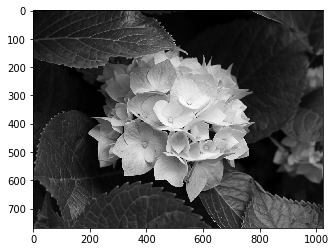

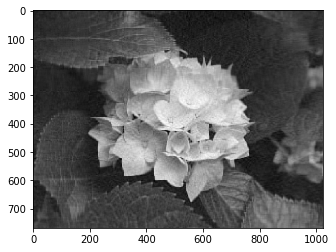

In [6]:
from numpy import *
from matplotlib import pyplot as plt
from PIL import Image

def svd_compress(filename):
    im = array(Image.open(filename).convert('L'))
    print im.shape
    plt.gray();plt.imshow(im)    
    U,S,VT = linalg.svd(im)
    n = 50;Sigma = eye(n,dtype=float)*S[:n]
    im2=dot(dot(U[:,:n],Sigma),VT[:n,:])
    print U.shape,S.size,Sigma.shape,VT.shape
    print U[:,:n].shape,Sigma.shape,VT[:n,:].shape
    plt.figure();plt.imshow(im2)    
    plt.show()
svd_compress(r'LinearAlgebraPic\Hydrangeas.jpg')
    

## 奇异值分解(SVD)应用-主成分分析(PCA)
主成分分析PCA(principal component analysis)是指通过一系列“简单”矩阵计算来近似一个一般矩阵。对于SVD分解
$$M = U\Sigma V^T$$
也可以重写成
$$M=E_1+E_2+\cdots +E_p$$
其中$p=min(m,n)$，分量矩阵$E_k$表达式为：
$$E-k=\sigma_ku_kv_k^T$$
如果只取前面$r<p$项求和，
$$M_r=E_1+E_2+\cdots+E_r$$
结果就是原始矩阵的近似矩阵。

### 例1
设有一组2维的数据，共有10个样本点
$$A=
\begin{array}{c|lcr}
x & y \\
\hline
2.5 & 2.4 \\
0.5 & 0.7 \\
2.2 & 2.9 \\
1.9 & 2.2 \\
3.1 & 3.0 \\
2.3 & 2.7 \\
2 & 1.6 \\
1 & 1.1 \\
1.5 & 1.6 \\
1.1 & 0.9 \\
\end{array}
$$
写成矩阵的形式，
$$A = 
\left[
\begin{matrix}
2.5 & 2.5 & 2.2 & 1.9 & 3.1 & 2.3 & 2 & 1 & 1.5 & 1.1 \\
2.4 & 0.7 & 2.9 & 2.2 & 3.0 & 2.7 & 1.6 & 1.1 & 1.6 & 0.9
\end{matrix}
\right]
$$
**第一步** 分别求得$x$和$y$的平均值$\left[\begin{matrix}1.81 \\ 1.91 \end{matrix}\right]$，然后从样本中减去均值，可得
$$A_{diff} = 
\left[
\begin{matrix}
0.69 & -1.31 &  0.39 &  0.09 &  1.29 &  0.49 &  0.19 & -0.81 & -0.31 & -0.71 \\
0.49 & -1.21 &  0.99 &  0.29 &  1.09 &  0.79 & -0.31 & -0.81 & -0.31 & -1.01
\end{matrix}
\right]
$$
**第二步** 求$A_{diff}$的协方差矩阵
$$A_{cov}=\frac{1}{N-1}A_{diff}A_{diff}^H=
\left[
\begin{matrix}
0.61655556 & 0.61544444  \\
0.61544444 & 0.71655556 
\end{matrix}
\right]
$$
**第三步** 对$A_{cov}$求特征值与特征向量
$$eigenvalues = 0.0490834, 1.28402771$$
$$eigenvectors = 
\left[
\begin{matrix}-0.73517866 & -0.6778734 \\ 0.6778734  & -0.73517866 \end{matrix}
\right]
$$
特征值0.0490834对应的特征向量是$\left[\begin{matrix}-0.73517866  \\ 0.6778734 \end{matrix}\right]$  
特征值1.28402771对应的特征向量是$\left[\begin{matrix}-0.67787346  \\ -0.73517866 \end{matrix}\right]$  
**第四步** 将特征值按降序排列，选前面$k$个，然后将这$k$个特征向量作为列向量组成特征向量矩阵  
这个例子只有两个特征值，取出$1.28402771$，对应的特征向量是$\left[\begin{matrix}-0.67787346  \\ -0.73517866 \end{matrix}\right]$  
**第五步** 将矩阵$A_{diff}$投影到选出的特征向量上
$$A_{final}=A_{diff}\times eigenvectors[1]\times eigenvectors[1]^T+A_{mean}=$$
$$
\left[
\begin{matrix}
-0.82797019 \\
 1.77758033 \\
-0.99219749 \\
-0.27421042 \\
-1.67580142 \\
-0.9129491 \\
 0.09910944 \\
 1.14457216 \\
 0.43804614 \\
 1.22382056
\end{matrix}
\right]
$$
